In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('datasets/AviationData.csv', encoding='latin1')

/tmp/ipykernel_13099/989472967.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('datasets/AviationData.csv', encoding='latin1')


Este dataset contiene la base de datos de accidentes de aviación de la NTSB contiene información desde 1962 en adelante sobre accidentes de aviación civil e incidentes seleccionados dentro de los Estados Unidos, sus territorios y posesiones, asi como en aguas internacionales.

In [4]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [5]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Ahora vamos a ver en que fase de vuelo se presentan el mayor numeros de eventos de seguridad, con el fin de colocar el mayor esfuerzo de prevencion en estas fases de vuelo.

In [6]:
df_fase_de_vuelo_cantidad_eventos = pd.DataFrame(df['Broad.phase.of.flight'].value_counts())
df_fase_de_vuelo_cantidad_eventos

,count
Broad.phase.of.flight,
Landing,15428
Takeoff,12493
Cruise,10269
Maneuvering,8144
Approach,6546
Climb,2034
Taxi,1958
Descent,1887
Go-around,1353


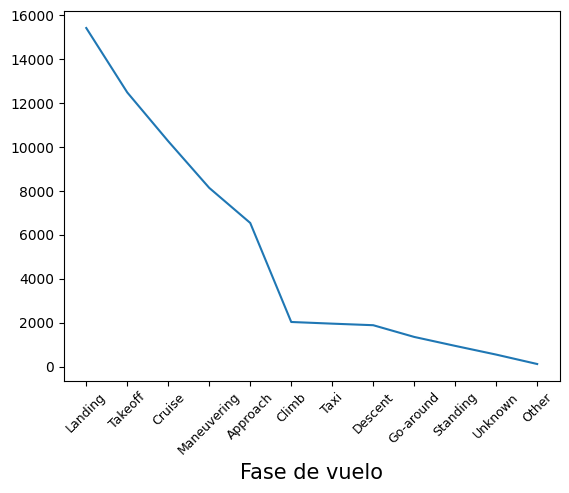

In [ ]:
plt.plot(df_fase_de_vuelo_cantidad_eventos)
plt.xlabel('Fase de vuelo', fontsize=15)
plt.xticks(rotation=45,fontsize=9)
plt.show()

Aca vemos que la mayor cantidad de eventos es en el aterrizaje y el despegue.

In [ ]:
df_tipo_evento = pd.DataFrame(df['Investigation.Type'].value_counts())
df_tipo_evento

,count
Investigation.Type,
Accident,85015
Incident,3874


Accidente. Todo suceso relacionado con la utilización de una aeronave, que, en el caso de una aeronave tripulada, ocurre entre el momento en que una persona entra a bordo de la aeronave, con la intención de realizar un vuelo, y el momento en que todas las personas han desembarcado, o en el caso de una aeronave no tripulada, que ocurre entre el momento en que la aeronave está lista para desplazarse con el propósito de realizar un vuelo y el momento en que se detiene, al finalizar el vuelo, y se apaga su sistema de propulsión principal, durante el cual:
a) cualquier persona sufre lesiones mortales o graves a consecuencia de:
    hallarse en la aeronave, o
    por contacto directo con cualquier parte de la aeronave, incluso las partes que se hayan desprendido de la aeronave, o
    por exposición directa al chorro de un reactor,
excepto cuando las lesiones obedezcan a causas naturales, se las haya causado una persona a sí misma o hayan sido causadas por otras personas o se trate de lesiones sufridas por pasajeros clandestinos escondidos fuera de las áreas destinadas normalmente a los pasajeros y la tripulación; o
b) la aeronave sufre daños o roturas estructurales que:
    afectan adversamente su resistencia estructural, su performance o sus características de vuelo; y que normalmente exigen una reparación importante o el recambio del componente afectado,excepto por falla o daños del motor, cuando el daño se limita a un solo motor (incluido su capó o sus accesorios); hélices, extremos de ala, antenas, sondas, álabes, neumáticos, frenos, ruedas, carenas, paneles, puertas de tren de aterrizaje, parabrisas, revestimiento de la aeronave (como pequeñas abolladuras o perforaciones), o por daños a álabes del rotor principal, álabes del rotor compensador, tren de aterrizaje y a los que resulten de granizo o choques con aves (incluyendo perforaciones en el radomo) o
c) la aeronave desaparece o es totalmente inaccesible.

Incidente. Todo suceso relacionado con la utilización de una aeronave, que no llegue a ser un accidente, que afecte o pueda afectar la seguridad de las operaciones.

Ahora vamos a ver los accidentes e incidentes por fase de vuelo

In [27]:
df_tipo_evento_en_fase_vuelo = df.groupby(['Broad.phase.of.flight', 'Investigation.Type']).size().reset_index(name='Total_eventos_por_fase_vuelo')
df_tipo_evento_en_fase_vuelo

,Broad.phase.of.flight,Investigation.Type,Total_eventos_por_fase_vuelo
0,Approach,Accident,6338
1,Approach,Incident,208
2,Climb,Accident,1850
3,Climb,Incident,184
4,Cruise,Accident,9904
5,Cruise,Incident,365
6,Descent,Accident,1778
7,Descent,Incident,109
8,Go-around,Accident,1338
9,Go-around,Incident,15


Ahora vamos a ver cuantas fatalidades por evento en cada fase de vuelo

In [17]:
Fatalidades_fase_de_vuelo= df.groupby('Broad.phase.of.flight')['Total.Fatal.Injuries'].sum().reset_index()
Fatalidades_fase_de_vuelo

,Broad.phase.of.flight,Total.Fatal.Injuries
0,Approach,3842.0
1,Climb,1762.0
2,Cruise,6173.0
3,Descent,913.0
4,Go-around,587.0
5,Landing,518.0
6,Maneuvering,5323.0
7,Other,85.0
8,Standing,161.0
9,Takeoff,4304.0


In [24]:
resultado = df.groupby('Broad.phase.of.flight').agg(
    Total_fatalidades=('Total.Fatal.Injuries', 'sum'),
    Total_serious_injuries=('Total.Serious.Injuries', 'sum')
).reset_index()
resultado['Total lesionados y muertos'] = resultado['Total_fatalidades'] + resultado['Total_serious_injuries']
resultado

,Broad.phase.of.flight,Total_fatalidades,Total_serious_injuries,Total lesionados y muertos
0,Approach,3842.0,1920.0,5762.0
1,Climb,1762.0,606.0,2368.0
2,Cruise,6173.0,2183.0,8356.0
3,Descent,913.0,473.0,1386.0
4,Go-around,587.0,388.0,975.0
5,Landing,518.0,1234.0,1752.0
6,Maneuvering,5323.0,1912.0,7235.0
7,Other,85.0,13.0,98.0
8,Standing,161.0,241.0,402.0
9,Takeoff,4304.0,3138.0,7442.0


In [ ]:
lesiones_muerte = pd.DataFrame()